# 3.2: Hierarchical clustering

### 3.2.1 Show a low level dendrogram containing 5 instances of each digit ( one person ).


## LINKS 
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html?highlight=agglomerative%20clustering#sklearn.cluster.AgglomerativeClustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from typing import List
import sys
from scipy.cluster.hierarchy import dendrogram

sys.path.insert(0, '/home/agervig/git/sm_pca')

from utils import data_utils


In [2]:
data_csv = pd.read_csv("../data_proc.csv", header=None)
data = pd.DataFrame.to_numpy(data_csv)
data = np.delete(data, 0, 1)
np.random.shuffle(data)


#X_train, Y_train, X_test, Y_test = data_utils.split_data_all(data, 0.8)

In [3]:
def get_data_student_cifers(data: np.array, student_id: int, cifers: List, instances: int):
    """
    data: np.ndarray -> image data incl. studnet id (col 0) and labels (col 1)
    student_id: int -> the student id of the student you want the data from 
    cifers: List -> A list of the cifers of interrest, to extract from the data of the student. EX: [0,4,7] will give you cifers 0, 4, 7
    instances: int -> how many instances of each cifer to return 
    """

    data_cifers = []
    data_student = data[data[:,0] == student_id]
    for c in cifers:
        data_cifers.extend(data_student[data_student[:,1] == c][0:instances])
    data_cifers = np.array(data_cifers)
    return data_cifers

In [49]:
def plot_dendrogram(model, thresh, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    print(linkage_matrix)
    print(linkage_matrix.shape)
    for i in range(linkage_matrix.shape[0]):
        #print(linkage_matrix[i][3])
        if linkage_matrix[i][3] < thresh:
            np.delete(linkage_matrix, i, axis=0)
    print(linkage_matrix.shape)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

(49, 4)
2.0
2.0
3.0
2.0
2.0
2.0
2.0
2.0
3.0
2.0
2.0
2.0
3.0
2.0
3.0
2.0
2.0
2.0
2.0
2.0
3.0
3.0
3.0
3.0
6.0
2.0
3.0
2.0
4.0
7.0
5.0
3.0
2.0
5.0
5.0
5.0
5.0
5.0
7.0
10.0
4.0
9.0
8.0
14.0
12.0
15.0
21.0
35.0
50.0
(49, 4)


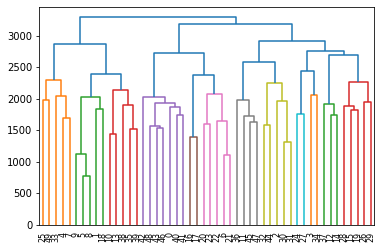

In [50]:
#Extracting data for one random student from the dataset
data_student = get_data_student_cifers(data, 1, [0,1,2,3,4,5,6,7,8,9], 5)

#creating dendogram for student data with 5 instanses of each cifer 
ward = AgglomerativeClustering(distance_threshold=50000, n_clusters=None, linkage='ward', compute_distances=True, compute_full_tree=True )
model = ward.fit(data_student)
#print(model.distances_)
plot_dendrogram(model, 1000)


### 3.2.2 Use K-Means clustering to compress each digit into 5 clusters, as done in 3.1.1, and perform hierarchical clustering to show a low level dendrogram of this (one person).


### 3.2.3 Discuss the results and relate them to the cross validation tables from k-NN classification

In [ ]:
#lool at confusion matrix of cross val and compare to hierarchical clustering